<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
from pathlib import Path
import zipfile

data = Path('data')
image_path = data/'piza_stake_sushi'

if image_path.is_dir():
  print('the image directory exists')
else:
  image_path.mkdir(parents = True, exist_ok = True)

In [4]:
import requests
with open(data/'pizza_steak_sushi.zip', 'wb') as f:
  req = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(req.content)


In [5]:
import zipfile
with zipfile.ZipFile(data/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping the files')
  zip_ref.extractall(image_path)

unzipping the files


# **Becoming one with the data**

In [6]:
import os
os.walk(image_path)

<generator object _walk at 0x7d89a18dfc30>

In [7]:
def oswalk(dirpath):

  for dirpath, dirnames, filepath in os.walk(dirpath):
    print(f'the dirpath is {dirpath} file path is {len(filepath)} dir name is {len(dirnames)}')

In [8]:
oswalk(image_path)

the dirpath is data/piza_stake_sushi file path is 0 dir name is 2
the dirpath is data/piza_stake_sushi/test file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/test/steak file path is 19 dir name is 0
the dirpath is data/piza_stake_sushi/test/pizza file path is 25 dir name is 0
the dirpath is data/piza_stake_sushi/test/sushi file path is 31 dir name is 0
the dirpath is data/piza_stake_sushi/train file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/train/steak file path is 75 dir name is 0
the dirpath is data/piza_stake_sushi/train/pizza file path is 78 dir name is 0
the dirpath is data/piza_stake_sushi/train/sushi file path is 72 dir name is 0


In [9]:
image_path

PosixPath('data/piza_stake_sushi')

In [10]:
train_dir = image_path / 'train'
test_dir = image_path/'test'

# **Visualizing the image**

In [11]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))


In [12]:
random_image = random.choice(image_path_list)
random_image

PosixPath('data/piza_stake_sushi/test/sushi/858157.jpg')

In [13]:
class_of_random = random_image.parent.stem

Random image path is data/piza_stake_sushi/test/sushi/858157.jpg
image class is sushi
image height : 288
image width : 512


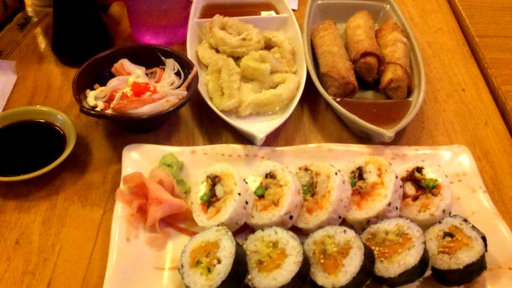

In [14]:
img = Image.open(random_image)
print(f'Random image path is {random_image}')
print(f'image class is {class_of_random}')
print(f'image height : {img.height}')
print(f'image width : {img.width}')
img

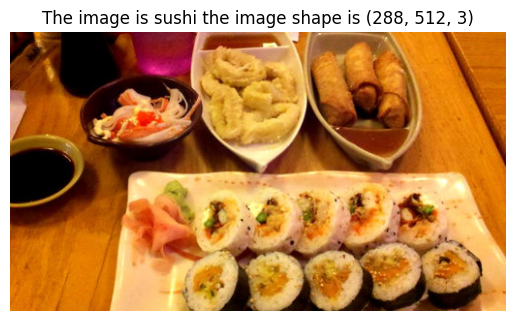

In [15]:
import matplotlib.pyplot as plt
import numpy as np

image_np = np.asarray(img)

plt.imshow(img);
plt.title(f'The image is {class_of_random} the image shape is {image_np.shape}');
plt.axis(False);

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

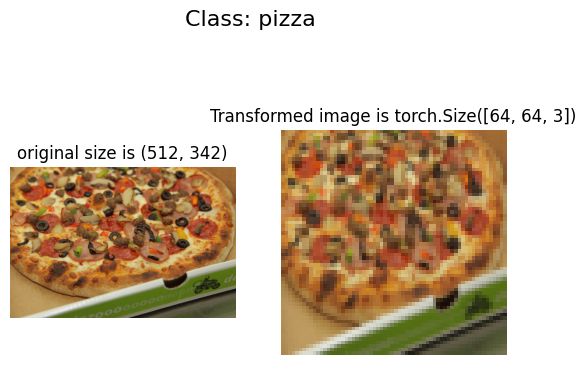

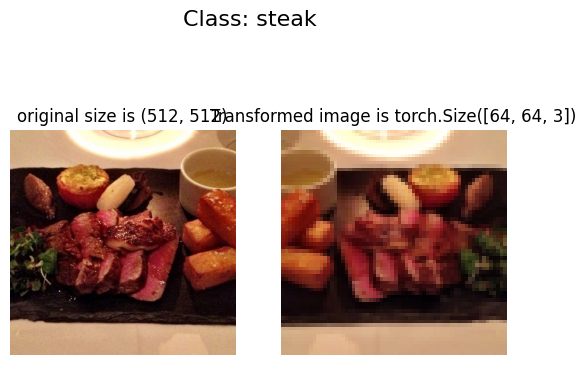

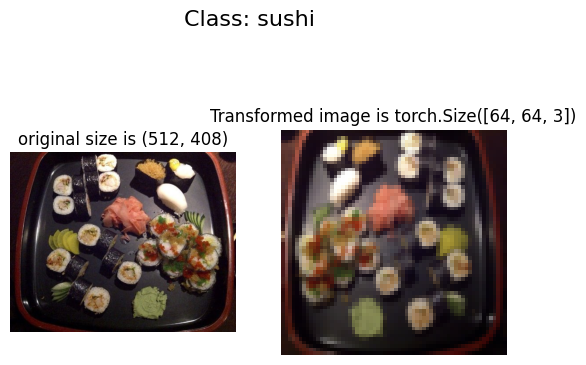

In [17]:
def plot_transformed_images(image_paths, transform, n =3, seed = 43):
  """ This function will plot the images before and after transforming side by side"""

  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'original size is {f.size}')
      ax[0].axis('off');

      #Transform and plot image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed image is {transformed_image.shape}')
      ax[1].axis('off');

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_path_list, data_transform, 3)








# **Loading Image Data Using Image Loader**

In [18]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [19]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,
                                     transform = data_transform,
                                     target_transform = None)
test_dataset = datasets.ImageFolder(root = test_dir,
                                    transform = data_transform,
                                    target_transform = None)


In [20]:
len(train_dataset), len(test_dataset)

(225, 75)

In [21]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [22]:
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
image, label = train_dataset[0]

print(f'the image shape: {image.shape}')
print(f'the label shape: {label}')
print(f'the image dtype: {image.dtype}')
print(f'the label dtype: {type(label)}')

the image shape: torch.Size([3, 64, 64])
the label shape: 0
the image dtype: torch.float32
the label dtype: <class 'int'>


the image shape is torch.Size([3, 64, 64]) the permuted shape is torch.Size([64, 64, 3])


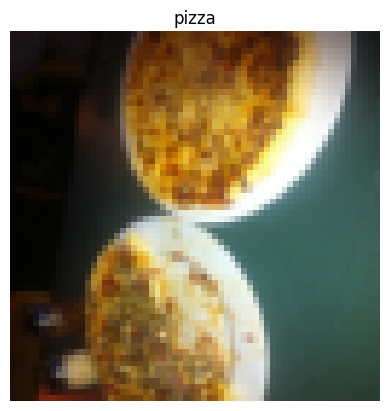

In [25]:
permuted_image = image.permute(2,1,0)
print(f'the image shape is {image.shape} the permuted shape is {permuted_image.shape}')
plt.imshow(permuted_image)
plt.title(class_names[label])
plt.axis('off');


In [26]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size = 32,shuffle = True)
test_dataloader = DataLoader (test_dataset, batch_size = 32, shuffle = True)

In [27]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d89037841c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d89041c6080>)

In [28]:
image, label = next(iter(train_dataloader))

In [29]:
image.shape

torch.Size([32, 3, 64, 64])

In [30]:
label.shape

torch.Size([32])

# **Loading Image with custom Datasets**

In [31]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [32]:
train_dataset.classes, test_dataset.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [33]:
image_path

PosixPath('data/piza_stake_sushi')

In [34]:
os.scandir(image_path/'train')

In [35]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [36]:
for entry in os.scandir(train_dir):
  print(entry)

<DirEntry 'steak'>
<DirEntry 'pizza'>
<DirEntry 'sushi'>


In [37]:
def find_classes(directory):
  classes = []
  class_dic = {}
  for entry in os.scandir(directory):
    classes.append(entry.name)
  for i, classname in enumerate(classes):
    class_dic[classname] = i
  return classes, class_dic

In [38]:
find_classes(train_dir)

(['steak', 'pizza', 'sushi'], {'steak': 0, 'pizza': 1, 'sushi': 2})

In [39]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, target_dir:str,transform = None) -> None:

    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index:int):
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self,index:int) -> Tuple[torch.tensor, int]:

    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [40]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [41]:
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                     transform = test_transforms)

In [42]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7d89cb840190>,
 <__main__.ImageFolderCustom at 0x7d89cb840d90>)

In [43]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [44]:
train_data_custom.classes

['steak', 'pizza', 'sushi']

In [45]:
train_data_custom.class_to_idx

{'steak': 0, 'pizza': 1, 'sushi': 2}

# **Create a function to display Random Images**

In [46]:
def display_random_images(train_dataset = train_dataset, classes= False, n = 10, img_shape = False, seed = None):

  if n>10:
    n = 10
    print('we cant print images more than 10')

  random.seed(seed)
  images = random.sample(range(len(train_dataset)), k= n)
  print(images)

  plt.figure(figsize = (16,9))
  # print('plt is right')
  for i in range(len(images)):
    # print('starting images')
    plt.subplot(5,2,i+1)
    # print('sub plot is right')
    img,label = train_dataset[images[i]]
    trans_img = img.permute(1,2,0)
    plt.imshow(trans_img)
    tit = ''
    if classes:
      tit = tit + 'the class name is ' + class_names[label]
    if img_shape:
      tit +='  and  '
      tit += str(img.shape)
    plt.title(tit)
  plt.tight_layout()
  plt.show()


we cant print images more than 10
[42, 73, 57, 180, 140, 165, 32, 69, 161, 116]


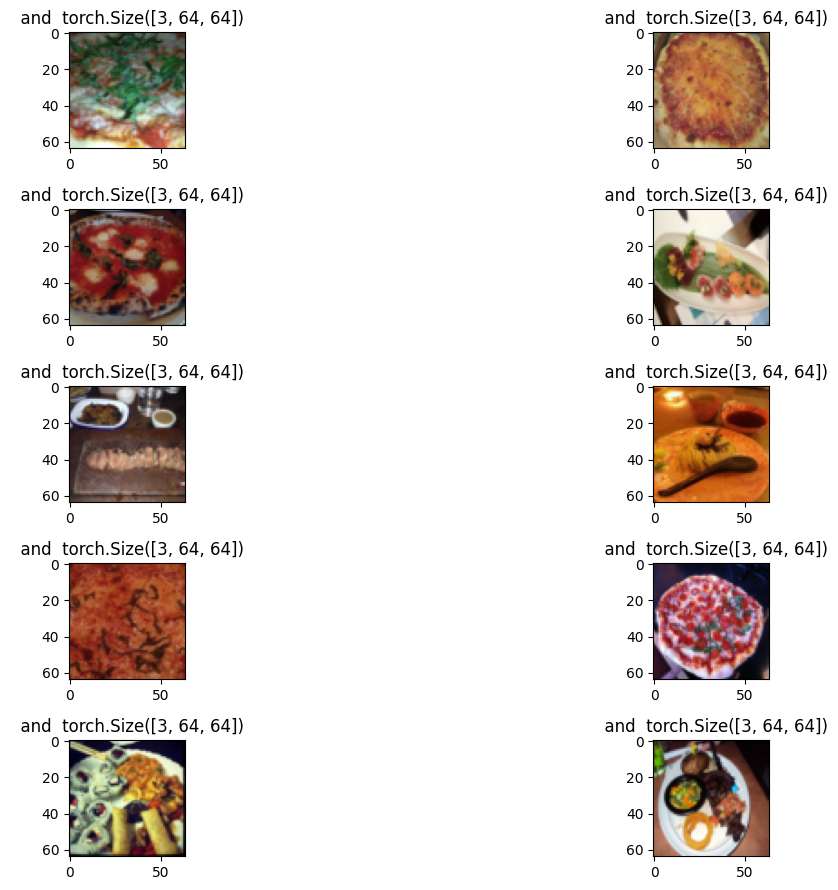

In [47]:
display_random_images(classes = False, n = 12, img_shape = True, seed = None)

# **Plot the image with out custom generated datasets**

[49, 129, 122, 62, 102, 21, 61, 152, 209, 10]


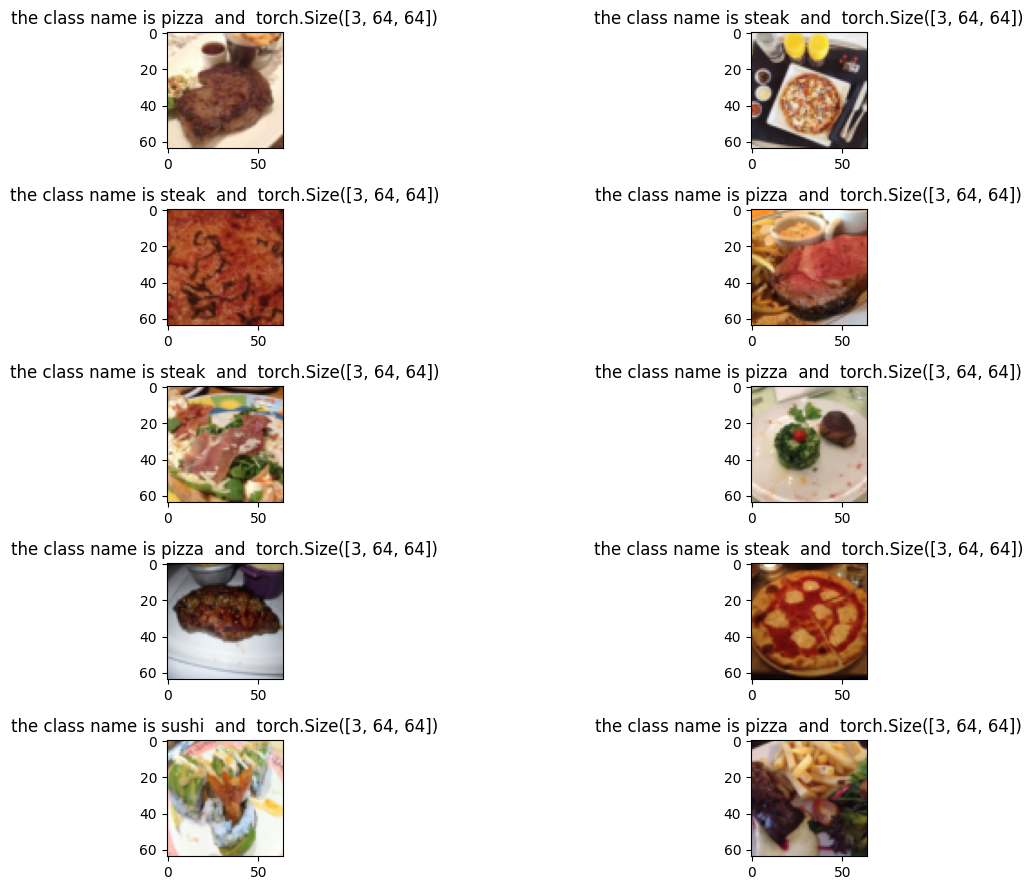

In [48]:
display_random_images(train_dataset = train_data_custom,classes = True, n= 10, img_shape = True, seed= None)

In [49]:
train_data_custom

In [50]:
train_dataset # we see that the variable passed don't show impact outside the function

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/piza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

# **Load the custom made data into dataloaders**

In [51]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size = 32,
                                     shuffle = True,
                                     num_workers =1)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size = 32,
                                    num_workers= 1)


In [52]:
train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7d8902d2bac0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d8902daba90>)

In [53]:
image, label = next(iter(train_dataloader))

print(f'the image shape is {image.shape}')
print(f'the label shape is {label.shape}')

the image shape is torch.Size([32, 3, 64, 64])
the label shape is torch.Size([32])


**Test the trivial augumenation**

In [54]:
from torchvision import transforms
triv_train_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor()

])

triv_test_transform = transforms.Compose([

    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [55]:
train_dir

PosixPath('data/piza_stake_sushi/train')

In [56]:
len(image_path_list)

300

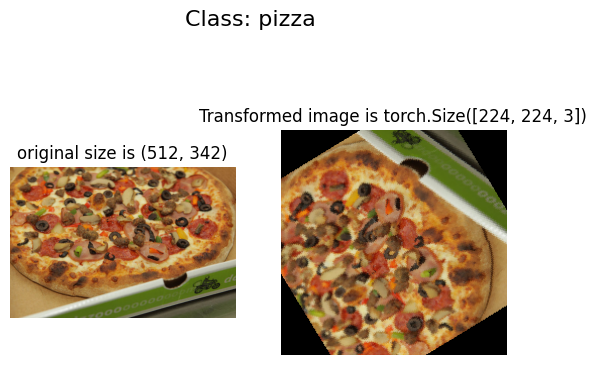

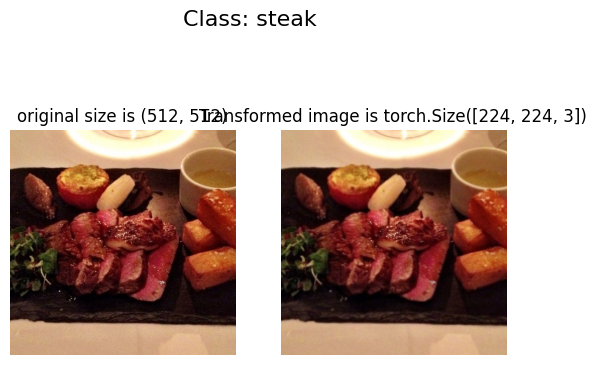

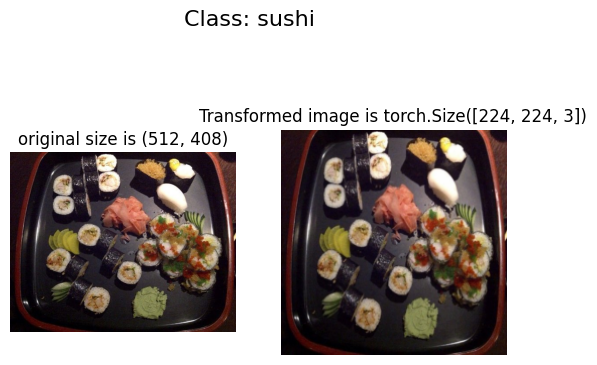

In [57]:
plot_transformed_images(image_path_list, transform = triv_train_transform,n = 3)

In [58]:
image_path_list[0]

PosixPath('data/piza_stake_sushi/test/steak/894825.jpg')

In [59]:
train_dir

PosixPath('data/piza_stake_sushi/train')

**Train model 0**

In [60]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [61]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir,transform = simple_transform)
test_dataset = datasets.ImageFolder(root= test_dir,transform = simple_transform)

In [62]:
import os
NUM_WORKERS = os.cpu_count()

In [63]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True, num_workers= NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_dataset, batch_size = 32,shuffle = False, num_workers = NUM_WORKERS)

In [64]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d8902e28490>,
 <torch.utils.data.dataloader.DataLoader at 0x7d8902e2b6d0>)

In [65]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [66]:
image, label = (next(iter(train_dataloader)))

In [67]:
image[0].shape

torch.Size([3, 64, 64])

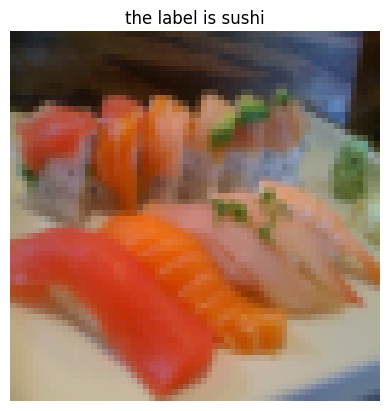

In [68]:
per_img = image[0].permute(1,2,0)
plt.imshow(per_img)
plt.title(f'the label is {class_names[label[0]]}')
plt.axis(False);

**Implementing Tiny VGG**

In [69]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(3,10,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU()
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(10, 10,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride =2)
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(10,10, kernel_size = 3, stride = 1,padding = 0),
        nn.ReLU()
    )

    self.block4 = nn.Sequential(
        nn.Conv2d(10,10, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(10 * 13 * 13, 32),  # 2890 instead of 289
        nn.ReLU(),
        nn.Linear(32, output_shape),
        nn.Softmax(dim=1),
    )


  def forward(self,x):

    x = self.block1(x)
    # print(f'the first layer output is {x.shape}')
    x = self.block2(x)
    # print(f'the secodn is {x.shape}')
    x = self.block3(x)
    # print(f'the thirs is {x.shape}')
    x = self.block4(x)
    # print(f'the foruth is {x.shape}')
    x = self.classifier(x)
    return x

model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
model0

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=3, bias=True)
    (4): Softmax(dim=1)
  )
)

In [70]:
dummy_img = torch.randn(1, 3, 64, 64)
output = model0(dummy_img)

In [71]:
output.shape

torch.Size([1, 3])

In [72]:
!pip install torchinfo > /dev/null 2>&1

In [73]:
from torchinfo import summary

In [74]:
summary(model0, input_size = (32,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 62, 62]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
├─Sequential: 1-2                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-3                        [32, 10, 28, 28]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
├─Sequential: 1-4                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU

In [75]:
from sklearn.metrics import accuracy_score
def accuracy(y_test, y_preds):
  return accuracy_score(y_test, y_preds)

In [76]:
len(train_dataloader)

8

In [93]:
from tqdm.auto import tqdm

In [102]:
def train_model(model,epochs,data,loss_fn, optimizer):
  """
  This function will train the model.
  input :
  Model you want to train.
  number of epochs you want to train on
  data that you want to train on,
  loss function you want to use,
  optimizer of your choice"""

  model.train()
  total_loss = 0
  train_acc = 0
  for train_data, train_labels in data:
    y_logits = model(train_data)
    train_loss = loss_fn(y_logits, train_labels)
    total_loss += train_loss.item()
    y_preds = y_logits.argmax(dim = 1)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_acc += accuracy(train_labels, y_preds)
    # train_acc += (y_preds == train_labels).sum().item()/len(train_data)
  train_acc = train_acc / (len(data))

  # if epoch%10 ==0:
  #   print(f'epoch:{epoch} -> trainloss:{total_loss/len(data)} -> train_acc: {train_acc}')
  return total_loss/len(data), train_acc


def test_model(model,data,loss_fn):
  """
  This function is used to test the model.
  input:
  Model you want to test,
  The test data,
  The loss function you want to use as metric
  """
  model.eval()
  total_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for test_data, test_labels in data:
      y_logits = model(test_data)
      test_loss = loss_fn(y_logits, test_labels)
      total_loss += test_loss.item()
      test_preds = y_logits.argmax(dim = 1)
      batch_acc = accuracy(test_labels, test_preds)
      test_acc += batch_acc
  return total_loss/len(data), test_acc/len(data)

  # print(f'The test_loss is : {total_loss/len(data)} -> test_acc: {test_acc/len(data)}')




In [96]:
model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.001)

In [97]:

train_model(model0, 5, train_dataloader, loss_fn,optimizer)
test_model(model0, test_dataloader, loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0 -> trainloss:1.1038461774587631 -> train_acc: 0.26953125
The test_loss is : 1.0868165095647175 -> test_acc: 0.2916666666666667


In [104]:
def train(model, epochs, train_data,test_data,loss_fn, optimizer):
  result = {}
  training_accuracies = []
  testing_accuracies = []
  training_losses = []
  testing_losses = []
  for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_model(model, epochs, train_data, loss_fn, optimizer)
    test_loss, test_accuracy = test_model(model, test_data, loss_fn)
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)
    training_losses.append(train_loss)
    testing_losses.append(test_loss)
    print(f'epoch:{epoch} -> trainloss:{train_loss} -> train_acc: {train_accuracy} -> test_acc:{test_accuracy}-> test_loss:{test_loss}')
  result['train_accuracies'] = training_accuracies
  result['test_accuracies'] = testing_accuracies
  result['testing_losses'] = testing_losses
  result['training_losses'] = training_losses
  return result


In [110]:
model0 = TinyVGG(input_shape = 3, output_shape = len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.001)

In [111]:
result = train(model0, 5,train_dataloader, test_dataloader, loss_fn,optimizer )

  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0 -> trainloss:1.101205289363861 -> train_acc: 0.3046875 -> test_acc:0.2604166666666667-> test_loss:1.1035027901331584
epoch:1 -> trainloss:1.096813514828682 -> train_acc: 0.33203125 -> test_acc:0.3636363636363636-> test_loss:1.0967118740081787
epoch:2 -> trainloss:1.0759704560041428 -> train_acc: 0.59375 -> test_acc:0.5634469696969697-> test_loss:1.072514295578003
epoch:3 -> trainloss:1.0589546710252762 -> train_acc: 0.52734375 -> test_acc:0.3409090909090909-> test_loss:1.0821229616800945
epoch:4 -> trainloss:1.0364339649677277 -> train_acc: 0.50390625 -> test_acc:0.6145833333333334-> test_loss:1.042271097501119


In [114]:
result

{'train_accuracies': [0.3046875, 0.33203125, 0.59375, 0.52734375, 0.50390625],
 'test_accuracies': [0.2604166666666667,
  0.3636363636363636,
  0.5634469696969697,
  0.3409090909090909,
  0.6145833333333334],
 'testing_losses': [1.1035027901331584,
  1.0967118740081787,
  1.072514295578003,
  1.0821229616800945,
  1.042271097501119],
 'training_losses': [1.101205289363861,
  1.096813514828682,
  1.0759704560041428,
  1.0589546710252762,
  1.0364339649677277]}

In [119]:
def plot_loss_curves(result):

  epochs = range(len(result['train_accuracies']))
  plt.figure(figsize= (12,8))
  plt.subplot(1,2,1)
  plt.plot(epochs,result['train_accuracies'], label = 'train_accuracy')
  plt.plot(epochs, result['test_accuracies'], label = 'test_accuracy')
  plt.title('The plot of accuracies')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, result['training_losses'], label = 'train_loss')
  plt.plot(epochs, result['testing_losses'], label = 'test_loss')
  plt.title('The plot of losses')
  plt.xlabel('epochs')
  plt.legend()


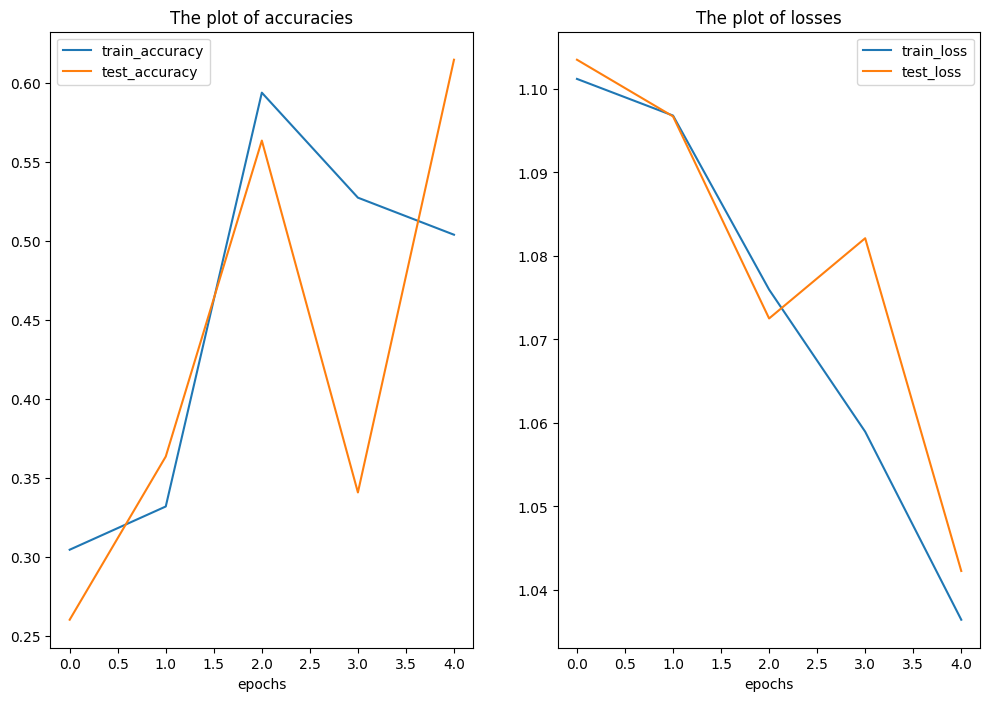

In [120]:
plot_loss_curves(result)